# 論理演算

---
[Google Colaboratoryで開く](https://colab.research.google.com/github/202408pythonciot/IPA_Exam/blob/main/FE/Section_A/FE_3_1.ipynb)

<a target="_blank" href="https://colab.research.google.com/github/202408pythonciot/IPA_Exam/blob/main/FE/Section_A/FE_3_1.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

---
## ブール代数と論理演算
ブール代数とは，イギリスの数学者のジョージ・ブールが19世紀が考案した集合を対象とした演算方法です。真(True)と偽(False)のみを扱います。ブール本人はデジタルコンピュータの研究をしていたわけではありませんが，後にクロード・シャノンによってブール代数の演算が電子回路（スイッチ）で実現できることを示しました。

論理演算は，基本的に**AND演算，OR演算，NOT演算**の3種類です。

### AND演算（論理積）
AND演算は，変数AとBが両方とも真(True)の時だけ演算結果が真(True)になる演算です。ブール代数の演算結果を示す表を**真理値表**と呼びますが，AND演算の真理値表は以下の通りになります。


| A | B | X (A AND B) |
| --- | --- | --- |
| 偽(False) | 偽(False) | 偽(False) |
| 偽(False) | 真(True) | 偽(False) |
| 真(True) | 偽(False) | 偽(False) |
| 真(True) | 真(True) | 真(True) |

またAND演算を行う論理回路をAND回路とよび，以下の回路記号で表現されます。

![AND回路](https://raw.githubusercontent.com/202408pythonciot/IPA_Exam/refs/heads/main/FE/Section_A/images/logic_and.svg)


### OR演算（論理和）

OR演算は，変数AとBのいずれか一方が真(True)のなら演算結果が真(True)になる演算です。OR演算の真理値表は以下の通りになります。

| A | B | X (A AND B) |
| --- | --- | --- |
| 偽(False) | 偽(False) | 偽(False) |
| 偽(False) | 真(True) | 真(True) |
| 真(True) | 偽(False) | 真(True) |
| 真(True) | 真(True) | 真(True) |

またOR演算を行う論理回路をOR回路とよび，以下の回路記号で表現されます。

![OR回路](https://raw.githubusercontent.com/202408pythonciot/IPA_Exam/refs/heads/main/FE/Section_A/images/logic_or.svg)


### NOT演算（否定）
NOT演算は，変数Aの値を反転させる演算になります。真理値表は以下の通りになります。

| A | X (NOT A) |
| --- | --- |
| 真(True) | 偽(False) |
| 偽(False) | 真(True) |

NOT回路の回路記号は以下のものになります。

![NOT回路](https://raw.githubusercontent.com/202408pythonciot/IPA_Exam/refs/heads/main/FE/Section_A/images/logic_not.svg)





## ※matplotlibによるベン図の作図

グラフ作成ライブラリのmatplotlibの拡張ライブラリとして`matplotlib_venn`が用意されています。これを使って，論理演算結果を表示する関数`plotlogic_venn2`を定義します。


In [4]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

def plotlogic_venn2(logic_ope_func = None, true_color = '#faa', false_color = '#fff', edge_color='#f66', edge_width = 2, label=('X', 'Y')):
  v = venn2(subsets = (1, 1, 1), set_labels=label)
  for x in (0, 1):
    for y in (0, 1):
      value = logic_ope_func(x, y)
      p = str(x)+str(y)
      if p != '00':
        if value == 1:
          v.get_patch_by_id(p).set_color(true_color)
        else:
          v.get_patch_by_id(p).set_color(false_color)
        v.get_patch_by_id(p).set_edgecolor(edge_color)
        v.get_patch_by_id(p).set_lw(edge_width)
        v.get_patch_by_id(p).set_alpha(1.0)
        v.get_label_by_id(p).set_text('')
      else:
        if value == 1:
          plt.gca().set_facecolor(true_color)
        else:
          plt.gca().set_facecolor(false_color)
        plt.gca().set_axis_on()

`plotlogic_venn2`をテストします。引数として`logic_ope_func`は2変数の引数をとり，その結果を返す関数を渡します。

`def`で定義すした関数を与えることもできますが，ここでは`lambda`式を使った関数を与えます。

`lambda x, y: x^y`は，xとyの排他的論理和の結果を返す無名関数です。


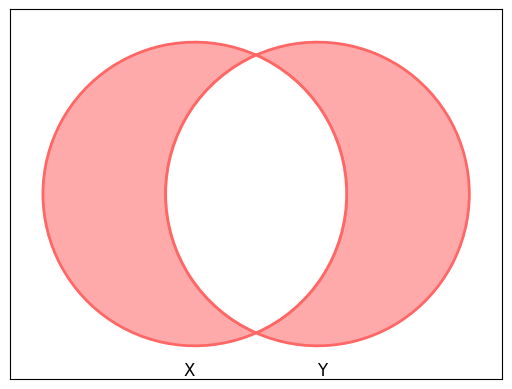

In [5]:
f = lambda x, y: x^y # x と y 　の排他的論理和
plotlogic_venn2(logic_ope_func = f)

同様に3変数のベン図を描画する`plotlogic_venn3`を定義します。

In [6]:
from matplotlib_venn import venn3

def plotlogic_venn3(logic_ope_func = None, true_color = '#faa', false_color = '#fff', edge_color='#f66', edge_width = 2, label=('X', 'Y', 'Z')):
  v = v=venn3(subsets = (1, 1, 1, 1, 1, 1, 1), set_labels=label)
  for x in (0, 1):
    for y in (0, 1):
      for z in (0, 1):
        value = logic_ope_func(x, y, z)
        p = str(x) + str(y) + str(z)
        if p != '000':
          if value == 1:
            v.get_patch_by_id(p).set_color(true_color)
          else:
            v.get_patch_by_id(p).set_color(false_color)
          v.get_patch_by_id(p).set_edgecolor(edge_color)
          v.get_patch_by_id(p).set_lw(edge_width)
          v.get_patch_by_id(p).set_alpha(1.0)
          v.get_label_by_id(p).set_text('')
        else:
          if value == 1:
            plt.gca().set_facecolor(true_color)
          else:
            plt.gca().set_facecolor(false_color)
          plt.gca().set_axis_on()

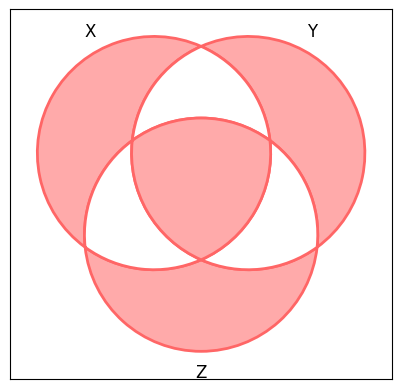

In [7]:
f = lambda x, y, z: x^y^z
plotlogic_venn3(logic_ope_func = f)

### **<font color= "#a00">確認問題</font>**
**※ITパスポート平成29年秋期 問98**

ベン図の網掛けをした部分の検索条件はどれか。

- ア　　(not A) and (B and C)
- イ　　(not A) and (B or C)
- ウ　　(not A) or (B and C)
- エ　　(not A) or (B or C)


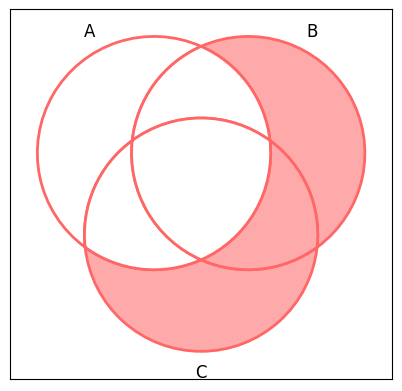

In [8]:
#@title ベン図
f = lambda A, B, C: not(A) and (B or C)
plotlogic_venn3(logic_ope_func = f, label=('A', 'B', 'C'))

<details>
<summary>
<font color= "#a00" size="+1"><b>正解</b></font>

</summary>

**解答**
イ　　(not A) and (B or C)

**解説**

| A | B | C | not A | (not A) and (B and C) | (not A) and (B or C) | (not A) or (B and C) | (not A) or (B or C) |
| --- | --- | --- | --- | --- | --- | --- | --- |
| 0 | 0 | 0 | 1 | 0 | 0 | 1 | 1 |
| 0 | 0 | 1 | 1 | 0 | 0 | 1 | 1 |
| 0 | 1 | 0 | 1 | 0 | 0 | 1 | 1 |
| 0 | 1 | 1 | 1 | 0 | 0 | 1 | 1 |
| 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 1 | 0 | 1 | 0 | 0 | 1 | 0 | 1 |
| 1 | 1 | 0 | 0 | 0 | 1 | 0 | 1 |
| 1 | 1 | 1 | 0 | 1 | 1 | 1 | 1 |

</details>






#### Pythonによる確認


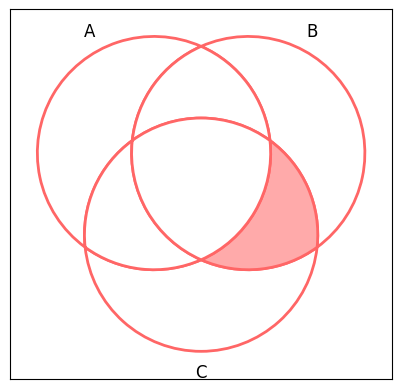

In [9]:
#@title ア "(not A) and (B and C)"のベン図
f = lambda A, B, C: not(A) and (B and C)
plotlogic_venn3(logic_ope_func = f, label=('A', 'B', 'C'))

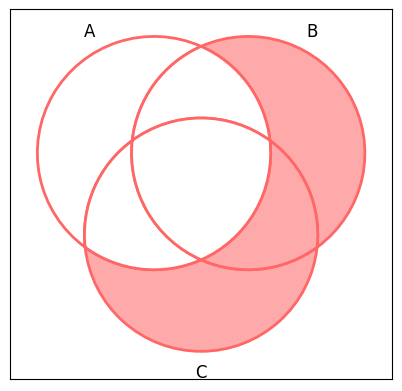

In [10]:
#@title イ "(not A) and (B or C)"のベン図
f = lambda A, B, C: not(A) and (B or C)
plotlogic_venn3(logic_ope_func = f, label=('A', 'B', 'C'))

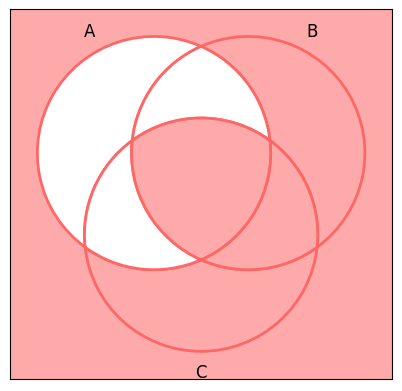

In [11]:
#@title ウ "(not A) or (B or C)"のベン図
f = lambda A, B, C: not(A) or (B and C)
plotlogic_venn3(logic_ope_func = f, label=('A', 'B', 'C'))

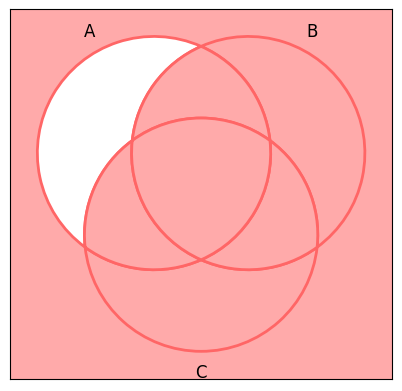

In [12]:
#@title エ "(not A) or (B or C)"のベン図
f = lambda A, B, C: not(A) or (B or C)
plotlogic_venn3(logic_ope_func = f, label=('A', 'B', 'C'))

### **<font color= "#a00">確認問題</font>**
**※基本情報技術者　令和元年度秋期　問22**

次の回路の入力と出力の関係として，正しいものはどれか。

![論理回路](https://raw.githubusercontent.com/202408pythonciot/IPA_Exam/refs/heads/main/FE/Section_A/images/FE_2019_A_Q22.svg)

**ア**

| 入力 A | 入力 B | 出力 X |
| --- | --- | --- |
| 0 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

**イ**

| 入力 A | 入力 B | 出力 X |
| --- | --- | --- |
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |


**ウ**

| 入力 A | 入力 B | 出力 X |
| --- | --- | --- |
| 0 | 0 | 1 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 0 |

**エ**

| 入力 A | 入力 B | 出力 X |
| --- | --- | --- |
| 0 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |



<details>
<summary>
<font color= "#a00" size="+1"><b>正解</b></font>

</summary>


**正解**

**イ**

| 入力 A | 入力 B | 出力 X |
| --- | --- | --- |
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

**解説**  


</details>

※Pythonで実装

In [13]:
def logic_and(x, y):
  return x and y

def logic_or(x, y):
  return x or y

def logic_not(x):
  return not x

def target_logic(a, b):
  t1 = logic_and(logic_not(a), b)
  t2 = logic_and(a, logic_not(b))
  return logic_or(t1, t2)

for x in (False, True):
  for y in (False, True):
    print(x, y, target_logic(x, y))

False False False
False True True
True False True
True True False


ベン図を書いてみます。

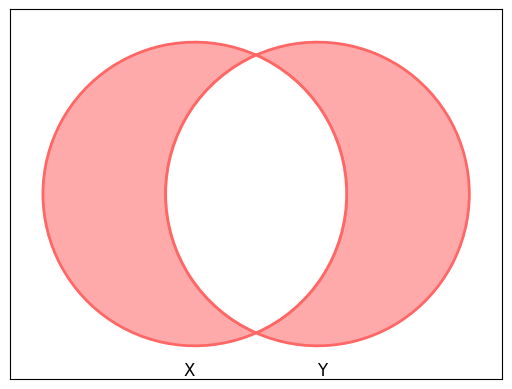

In [14]:
plotlogic_venn2(logic_ope_func = target_logic)